## **PCA Exercise: Dimensionality Reduction for Wine Clustering**

#### **Introduction**

This exercise will guide you through using Principal Component Analysis (PCA) to reduce the dimensionality of a wine dataset for improved clustering performance. The wine dataset includes various chemical properties of wines originating from three different cultivars. By applying PCA, you can visualize the data in lower dimensions and potentially enhance the efficiency of clustering algorithms.

#### **Objective**

*   Apply PCA to the wine dataset to reduce its dimensionality.
*   Visualize the data in a lower-dimensional space (2D or 3D) while preserving as much variance as possible.
*   Evaluate the impact of PCA on the performance of a clustering algorithm (e.g., K-means).

#### **Dataset Description**

The wine dataset can be found in the scikit-learn library (`sklearn.datasets.load_wine`). It consists of 178 samples, each representing a different wine. There are 13 features, all numerical, representing various chemical properties such as alcohol content, malic acid, ash, and color intensity. The target variable is the cultivar, which has three classes.  
For more info, refer to the documentation: [sklearn wine dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html)

#### **Tasks:**
**Steps:**

1.  **Load and explore the dataset**: Use the `load_wine()` function from scikit-learn to load the dataset. Familiarize yourself with the features and the target variable.
2.  **Data preprocessing**:
    *   Standardize the features to have zero mean and unit variance using `StandardScaler` from scikit-learn. This step is crucial for PCA as it is sensitive to feature scaling.
    *   Optionally, split the data into training and testing sets for evaluating the clustering performance.

3.  **Apply PCA**:
    *   Import `PCA` from scikit-learn.
    *   Create a PCA object, initially without specifying the number of components. Fit the PCA model to the standardized data.
    *   Analyze the explained variance ratio to determine the number of components that capture a significant portion of the total variance (e.g., 95%). This helps decide the optimal number of dimensions for reduction.

4.  **Visualize the data**:
    *   Transform the data into the lower-dimensional space using the fitted PCA model.
    *   Plot the transformed data points, color-coded by their cultivar class, in 2D or 3D. This visualization helps understand the separability of the classes in the reduced space.

5.  **Train a classifier**:
    *   Choose a clustering algorithm (e.g., K-means) and train it on the PCA-transformed data.
    *   Evaluate the clustering performance using appropriate metrics (e.g., Silhouette Score, Adjusted Rand Index) to assess how well the clusters align with the true labels.

6.  **Compare**:
    *   Train the same clustering algorithm on the original, non-PCA-transformed data.
    *   Compare the clustering performance with and without PCA to assess the impact of dimensionality reduction on clustering quality.

---

This exercise provides a practical understanding of how PCA can be used for dimensionality reduction and its potential benefits for data visualization and clustering tasks. By analyzing the results, you can gain insights into the effectiveness of PCA in simplifying data representation while preserving relevant information. Remember, the optimal number of components and the impact on clustering performance can vary depending on the dataset and the chosen algorithm. Experimentation and careful evaluation are key to leveraging PCA effectively.

Follow the steps outline above under **Tasks** to complete your PCA exercise.

### Load and explore the dataset

- Load the Wine dataset using sklearn.datasets.load_wine().

- Convert the dataset into a pandas DataFrame for easier manipulation.

- Display the first few rows of the dataset to understand its structure.

- Check for missing values and handle them if necessary.

In [47]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [48]:
import sklearn.datasets


wine = sklearn.datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data["target"] = wine.target
data.info() # no non null was detected, all is gud

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [49]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### Data preprocessing

- Standardize the dataset using StandardScaler from `sklearn.preprocessing`.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.drop("target", axis=1)
y = data["target"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
#X_test_scaled = scaler.transform(X_test)

### Apply PCA

- Import PCA from sklearn.decomposition.

- Apply PCA to the standardized dataset to reduce the dimensionality to 2 principal components.

- Display the explained variance ratio of the principal components.

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

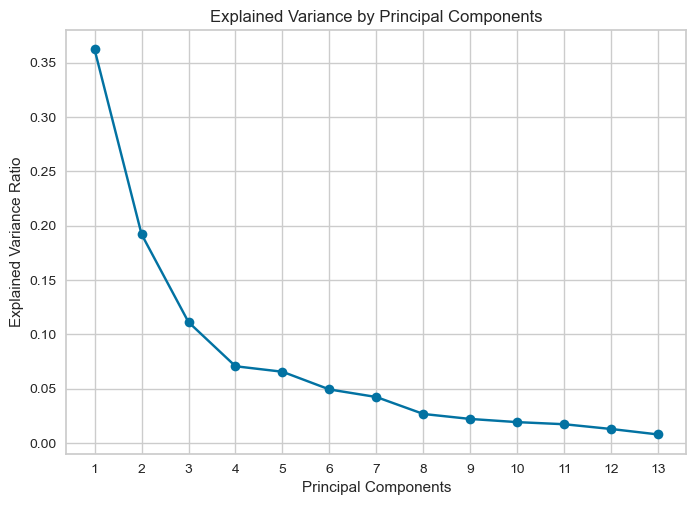

In [53]:
plt.plot(range(1, 14), pca.explained_variance_ratio_, "bo-")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.xticks(range(1, 14))
plt.show()

### Visualize the data

- Create a scatter plot of the first two principal components.

- Color the points based on the target labels to visualize the separation of classes in the reduced feature space.

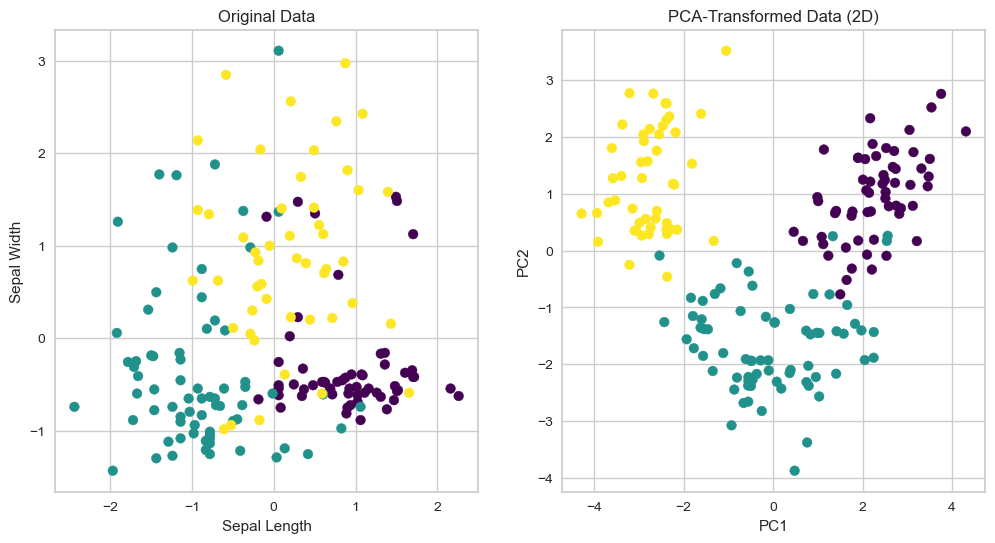

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y, cmap="viridis")
axs[0].set_xlabel("Sepal Length")
axs[0].set_ylabel("Sepal Width")
axs[0].set_title("Original Data")
axs[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y, cmap="viridis")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")
axs[1].set_title("PCA-Transformed Data (2D)")
plt.show()

In [55]:
X_train_pca

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

**Optional: Explore Different Numbers of Components (Interactive 3D Plot)**
- Apply PCA to reduce the data to 3 principal components.

- Use Plotly to create an interactive 3D scatter plot of the PCA-transformed data. (`pip install plotly` if haven't install the library)

In [56]:
%pip install plotly
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [57]:
# model_pca = LogisticRegression(random_state=42)
# model_pca.fit(X_train_scaled[:, :2], y_train)

# y_pred_pca = model_pca.predict(X_test_pca[:, :2])

# y_pred_pca

fig = px.scatter_3d(X_train_pca, x=0, y=1, z=2, color=0)
fig.show()



### Training time!!
- Apply K-means clustering to the PCA-transformed data.

- Evaluate the clustering performance using Silhouette Score and Adjusted Rand Index (ARI).

In [58]:
from sklearn.metrics import accuracy_score

### Compare the performance
- Apply K-means clustering to the original standardized data.

- Evaluate the clustering performance using Silhouette Score and Adjusted Rand Index (ARI).

- Compare the clustering performance metrics (Silhouette Score and Adjusted Rand Index) for PCA-transformed data versus the original data.

In [59]:
import os

# optional: to avoid memory leak on
# Windows with MKL when using KMeans
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans


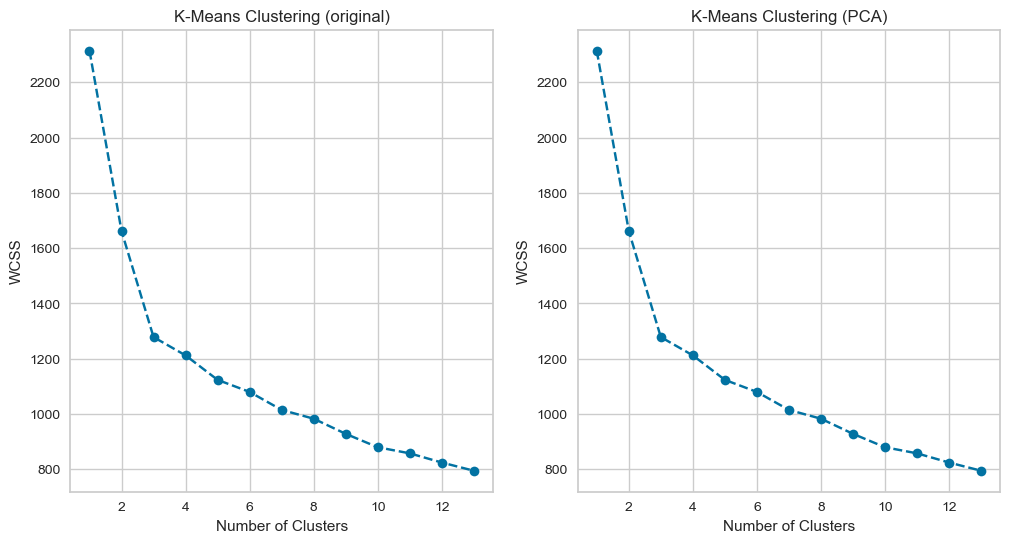

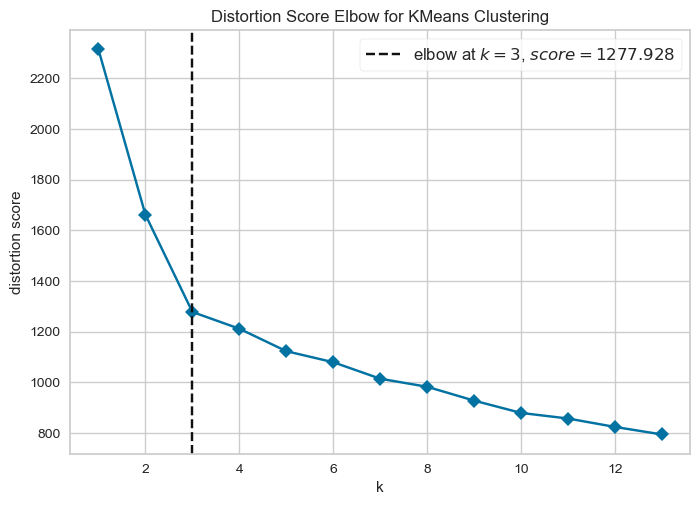

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
origi = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_scaled) # original scaled data (before PCA)
    origi.append(kmeans.inertia_)

pcaed = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_pca) # pca
    pcaed.append(kmeans.inertia_)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(range(1, 14), origi, marker="o", linestyle="--")
axs[0].set_ylabel("WCSS")
axs[0].set_xlabel("Number of Clusters")
axs[0].set_title("K-Means Clustering (original)")
axs[1].plot(range(1, 14), pcaed, marker="o", linestyle="--")
axs[1].set_ylabel("WCSS")
axs[1].set_xlabel("Number of Clusters")
axs[1].set_title("K-Means Clustering (PCA)")
plt.show()

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 14), timings=False)

# Fit the data and visualize
visualizer.fit(X_train_scaled)
visualizer.poof()

visualizer.fit(X_train_pca)
visualizer.poof()

In [61]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)
pred_y = kmeans.predict(X_train_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_train_pca)
pred_y_pca = kmeans_pca.predict(X_train_pca)

In [62]:
pred_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
pred_data["KMeans_Cluster"] = pred_y

pred_data_pca = pd.DataFrame(X_train_pca, columns=X_train.columns)
pred_data_pca["KMeans_Cluster"] = pred_y_pca

Visualize the clusters formed by K-means on the PCA-transformed data and the original data.

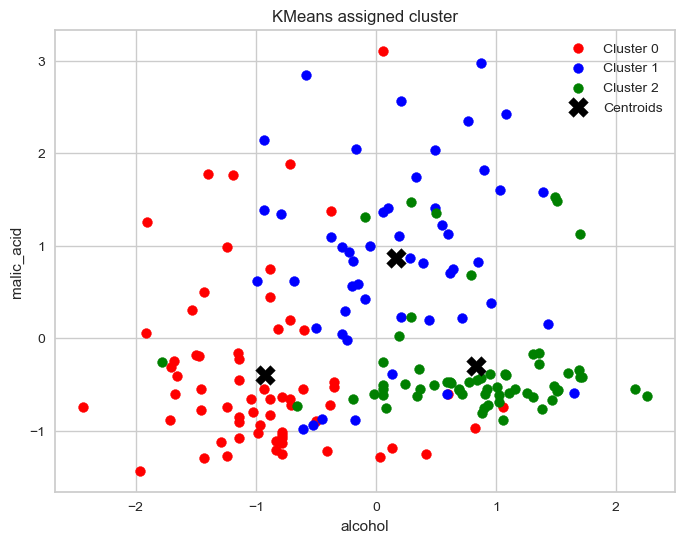

In [66]:
temp = pd.DataFrame(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(temp.iloc[pred_y == 0, 0], temp.iloc[pred_y == 0, 1], s=50, c="red", label="Cluster 0")
plt.scatter(temp.iloc[pred_y == 1, 0], temp.iloc[pred_y == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(temp.iloc[pred_y == 2, 0], temp.iloc[pred_y == 2, 1], s=50, c="green", label="Cluster 2")

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    marker="X",
    c="black",
    label="Centroids",
)

plt.title("KMeans assigned cluster")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()
plt.show()

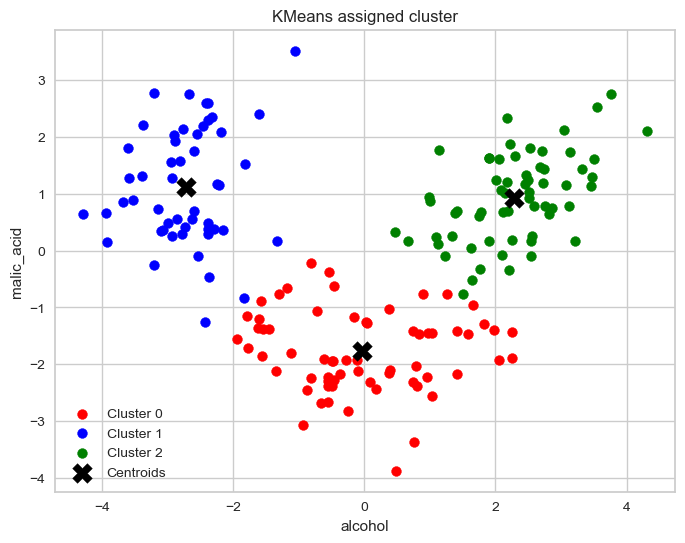

In [68]:
temp = pd.DataFrame(X_train_pca)

plt.figure(figsize=(8, 6))
plt.scatter(temp.iloc[pred_y == 0, 0], temp.iloc[pred_y == 0, 1], s=50, c="red", label="Cluster 0")
plt.scatter(temp.iloc[pred_y == 1, 0], temp.iloc[pred_y == 1, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(temp.iloc[pred_y == 2, 0], temp.iloc[pred_y == 2, 1], s=50, c="green", label="Cluster 2")

plt.scatter(
    kmeans_pca.cluster_centers_[:, 0],
    kmeans_pca.cluster_centers_[:, 1],
    s=200,
    marker="X",
    c="black",
    label="Centroids",
)

plt.title("KMeans assigned cluster")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()
plt.show()

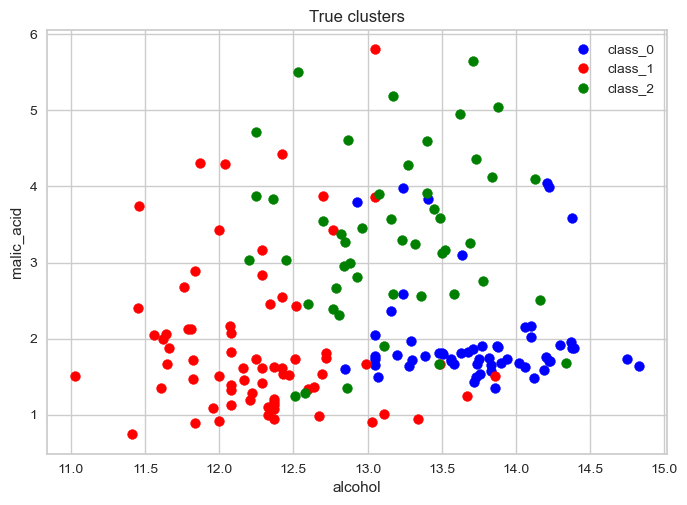

In [37]:
y = wine.target

# True clusters
plt.scatter(data.values[y == 0, 0], data.values[y == 0, 1], s=50, c="blue", label="class_0")
plt.scatter(data.values[y == 1, 0], data.values[y == 1, 1], s=50, c="red", label="class_1")
plt.scatter(data.values[y == 2, 0], data.values[y == 2, 1], s=50, c="green", label="class_2")

plt.title("True clusters")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()
plt.show()